In [1]:
# I load the needed libraries
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Exercise 1: Discrete random variable

#### The probability distribution function of a discrete variable k is given by the following:

$$
p(k) = 
\begin{equation}
    \begin{cases}
      \frac{k}{15} \hspace{1 cm} \text{with} \hspace{5 mm}\text{k} = 1, 2, 3, 4, 5\\
      0 \hspace{1.2 cm} \text{otherwise}
    \end{cases}
\end{equation}
$$


#### 1.1) Define the Probability Distrubution its relative Cumulative Distribution

In [2]:
# First I define the parameters to be used for the specific case
points = 10
initial = 1
final = 5
normalization = 15 # Could be set afterwards, but we take it as a parameter now

# Function able to generate the discrete PDF
generate_pdf = function (points, initial, final, normalization) {
    pdf = double(points)
    for (i in 1:points) {
        if (i >= initial & i <= final) {
            pdf[i] = i/normalization
        } else {
            pdf[i] = 0
        }
    }
    return (pdf)
}

# Function able to generate the discrete PDF from a given CDF
generate_cdf = function (pdf) {
    len = length(pdf)
    cdf = double(len)

    cdf[1] = pdf[1]
    for (i in 2:len){
        cdf[i] = cdf[i-1] + pdf[i]
    }
    return (cdf)
}

#### 1.2) Plotting the CDF and PDF

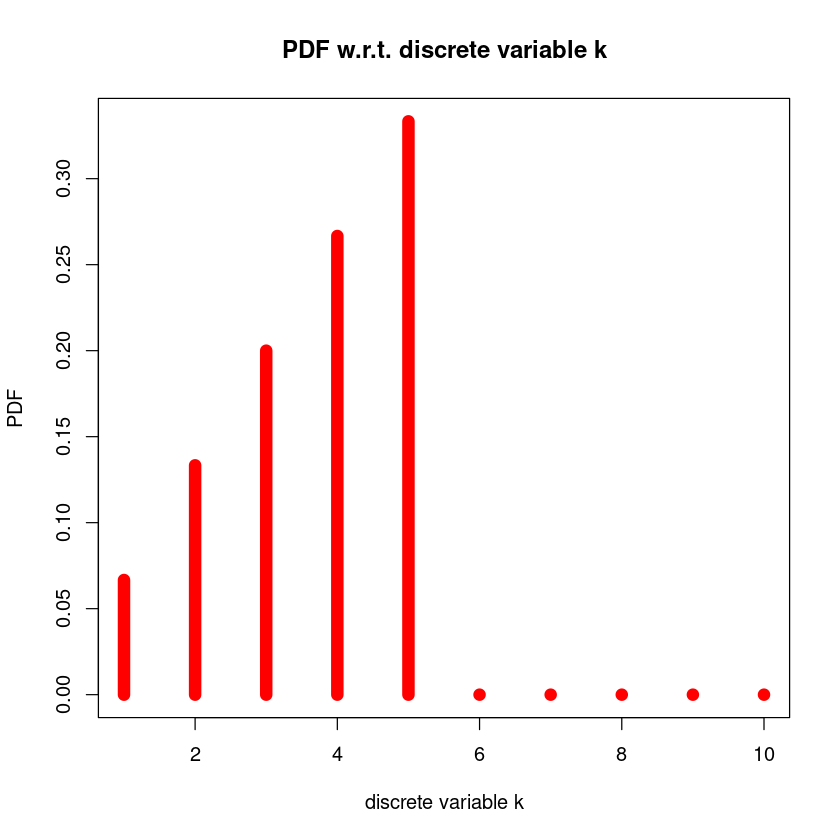

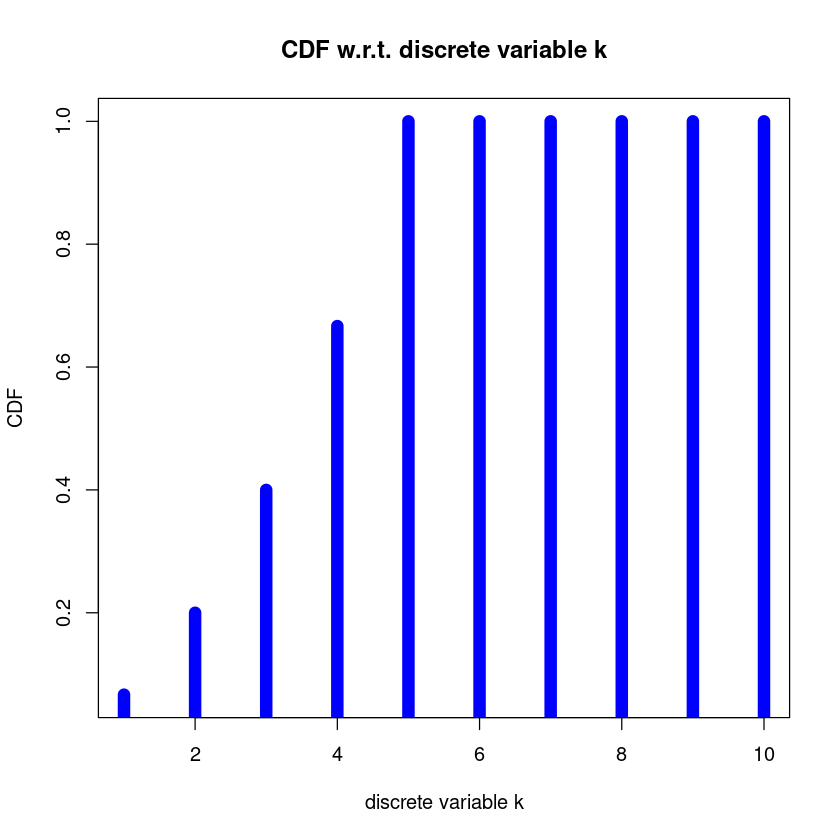

In [3]:
# We first define the mean of the x axis for the plot
x_axis = 1:points

# Then we use the previously defined functions
pdf = generate_pdf (points, initial, final, normalization)
cdf = generate_cdf(pdf)

# And we plot them
plot(x_axis, pdf, type="h", lwd=10, col="red", xlab="discrete variable k", ylab="PDF", main="PDF w.r.t. discrete variable k")
plot(x_axis, cdf, type="h", lwd=10, col="blue", xlab="discrete variable k", ylab="CDF", main="CDF w.r.t. discrete variable k")

#### 1.3) Computing the mean value and variance of the distribution

In [4]:
# I evaluate mean and variance from the definition of them
mean = 0
variance = 0

for (i in 1:points){
    mean = mean + pdf[i]*i
    variance = variance + pdf[i]*i**2 # Here I sum only the contribute of the expected value of the squared values
}

# Then I have to subtract the second power of the mean
variance = variance - mean**2


cat("Mean value of distribution is", mean, "\n")
cat("Variance of distribution is", variance)

Mean value of distribution is 3.666667 
Variance of distribution is 1.555556

#### 1.4) Computing the expected value of $E[k(6-k)]$ 

In [5]:
# As from the theory, we loop on the pdf distribution summing the weigted values
expected_value = 0
for (k in 1:points){
    expected_value = expected_value + pdf[k]*(k*6 - k**2)
}

cat("The expected value of E[k(6-k)] is:", expected_value)

The expected value of E[k(6-k)] is: 7

#### 1.5) Function that selects random numbers from the PDF

In [6]:
# We create a function able to return a point generated according to the selected PDF: calling the function multiple times, we expect the values to tend to the pdf
generator = function(pdf){
    cdf = generate_cdf(pdf)
    u = runif(1) # Pick a random number in the uniform distribution [0:1)

    entered = TRUE # Boolean value for the check
    output = 0
    for (k in 1:length(pdf)){
        if (u < cdf[k] & entered == TRUE) {
            output = k
            entered = FALSE
        }
    }
    return(output)
}

#### 1.6) To check the written function, I plot $10^5$ points chosen randomly according to the PDF

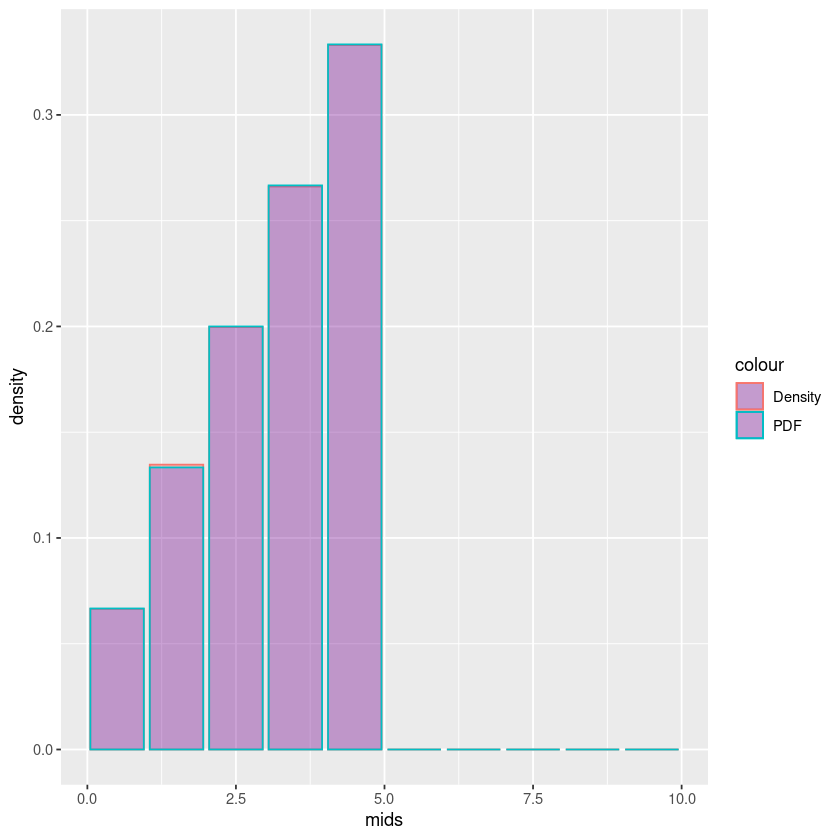

In [7]:
# I decide to take 10^5 points and to sample them using the previous function
number = as.integer(1e5)
numbers = double(number)
for (i in 1:number) {
    numbers[i] = generator(pdf)
}

# I search the density of the generated distribution and insert them into a dataframe in order to plot them
data = hist(numbers, breaks = 0:points, plot=F)
df = data.frame(mids=data$mids, density=data$counts/number, pdf=pdf)

# In the histogram I expect to have only values in the [initial:final] interval
gg = ggplot(df, aes(x=mids)) +
    geom_bar(aes(y=density, colour="Density"), stat="identity", fill = "red", alpha = 0.2) +
    geom_bar(aes(y=pdf, colour="PDF"), stat="identity", fill = "blue", alpha = 0.2)

# The purple graph shows that the generated points are in accordance with the distribution (with a smaller number one can see the difference in the two plots)
print(gg)

# Exercise 2: Continuous Random Variable

#### The triangular distribution, in the interval (a, b), is given by the following:

$$
f(X) = 
\begin{equation}
    \begin{cases}
      \frac{2(x-a)}{(b-a)(c-a)} \hspace{1 cm} a \leq x < c \\
      \frac{2(b-x)}{(b-a)(b-c)} \hspace{1 cm} c < x \leq b \\
      0 \hspace{2.1 cm} \text{otherwise}
    \end{cases}
\end{equation}
$$

#### where $c \in [a, b]$

#### 2.1) Plotting the triangular distribution in the interval (a, b)

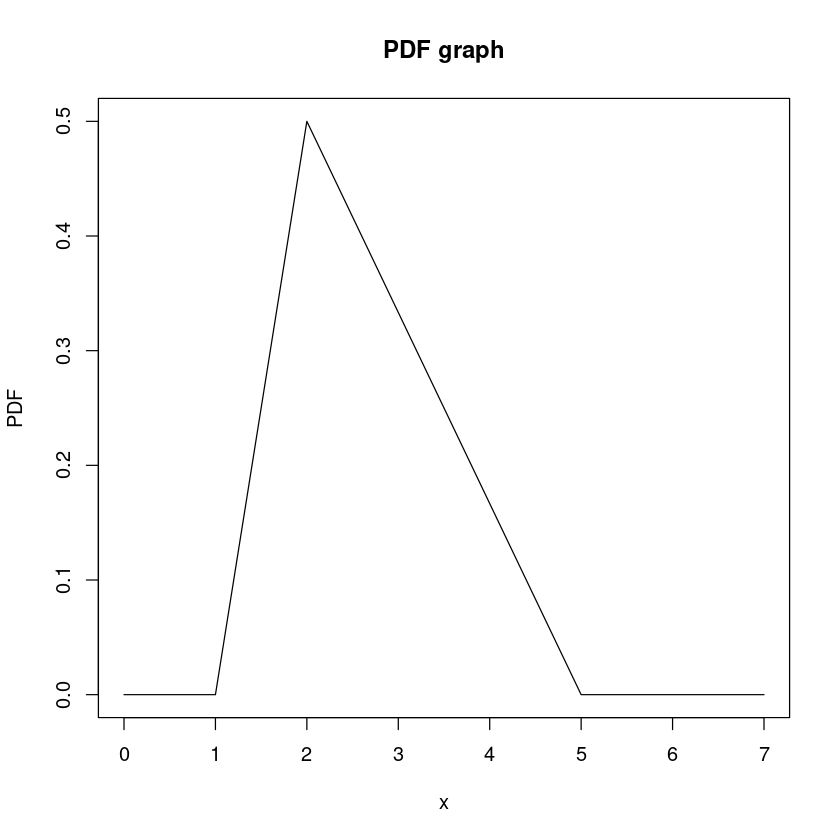

In [8]:
# In order to plot the function, I create a function that returns the value of the PDF from the input
triangular = function(x, a, b, c){
    out = 0
    if ((x < c) && (x > a)) {
        out = 2*(x-a)/((b-a)*(c-a))
    } else if ((x >= c) && (x < b)) {
        out = 2*(b-x)/((b-a)*(b-c))
    }
    return(out)
}

# From this function, the code is able to reproduce a triangular distribution
# Thus I enter some random parameters to check the function of
a = 1
b = 5
c = 2
up = 7
down = 0

# And then I create a sequence of points in order to plot the pdf
x = seq(down, up, by=0.01)
triangolare = double(length(x))
for (l in 1:length(x)){
    triangolare[l] = triangular(x[l], a, b, c)
}

# That plotted gives the result
plot(x, triangolare, type="l", ylab="PDF", main="PDF graph")


I plot also the cumulative distribution

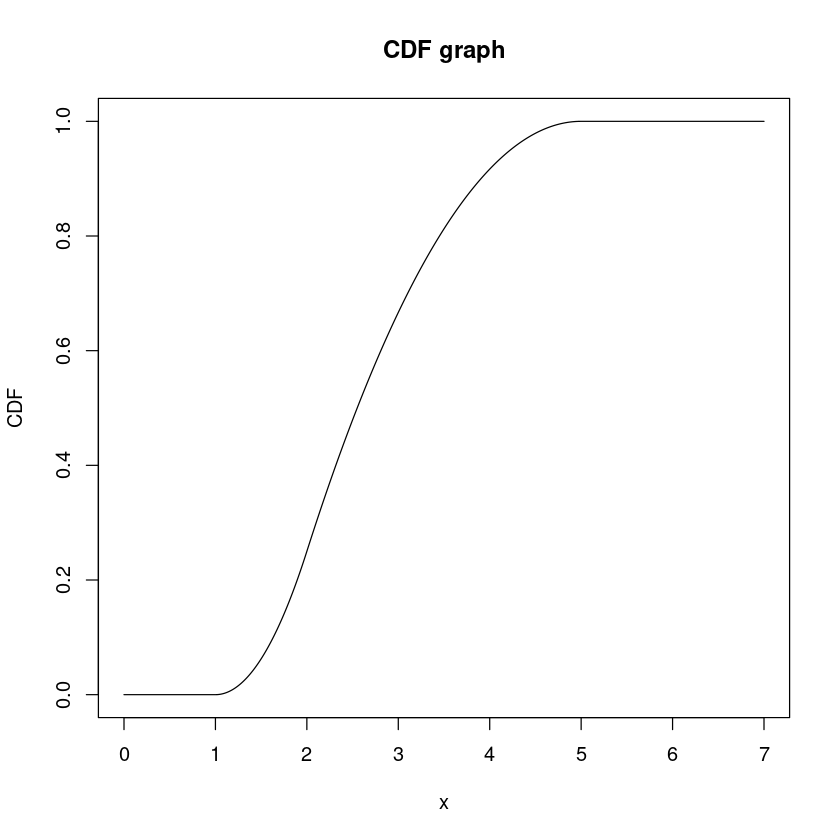

In [9]:
# From the integral of the formulas for the triangolar distribution, I generate the Cumulative function:
cdf = function (x, a, b, c) {
    out = 0
    if ((x < c) && (x > a)) {
        out = x*(x-2*a)/((b-a)*(c-a)) + a**2/((b-a)*(c-a)) 
    } else if ((x >= c) && (x < b)) {
        out = x*(2*b-x)/((b-a)*(b-c)) - c*(2*b-c)/((b-a)*(b-c)) + c*(c-2*a)/((b-a)*(c-a)) + a**2/((b-a)*(c-a))
    } else if (x >= b) {
        out = 1
    }
    return(out)
}

# Similarly I generate the CDF plot using a sequence of points in which I evaluated the function
triangolare_cdf = double(length(x))
for (l in 1:length(x)){
    triangolare_cdf[l] = cdf(x[l], a, b, c)
}

#  One can easily see that the CDF is not simmetrical 
plot(x, triangolare_cdf, type="l", ylab="CDF", main="CDF graph")


#### 2.2) Function able to generate random numbers according to the triangular distribution

In [10]:
# I write then a function that returns a point according to the PDF distribution
pdf_generator = function (a, b, c) {
    u = runif(1)
    out = 0

    # Check if the data is in the first or second part of the curve:
    if (u < ((c-a)/(b-a))) {
        out = a + sqrt(u*(b-a)*(c-a)) # Formula of the inverse CDF retrieved by hand
    } else {
        out = b - sqrt((1 - u)*(b-a)*(b-c)) # Formula of the inverse CDF retrieved by hand
    }
    return(out)
}

#### 2.3) Generate $10^4$ numbers and prove that it is a triangulat dristribution

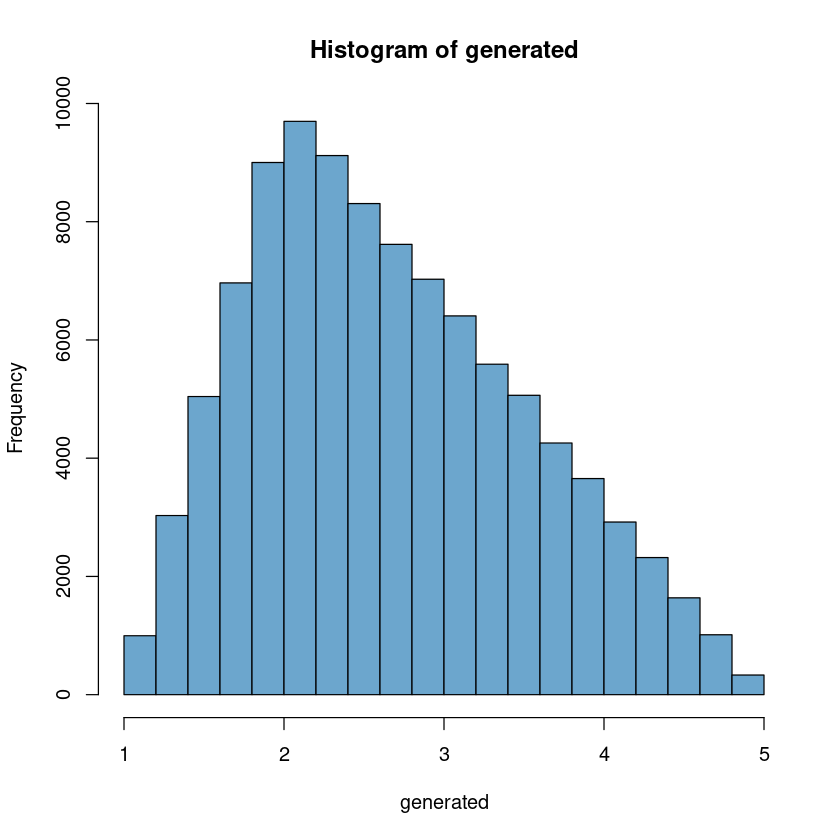

In [11]:
# I pick 10^4 numbers and run the function for each of them
n = as.integer(1e5)
generated = double(n)
for (i in 1:n) {
    generated[i] = pdf_generator(a, b, c)
}

hist(generated, col = 'skyblue3', breaks = 20)

# Exercise 3) Waiting time at the doctor
#### The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30
#### 3.1) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

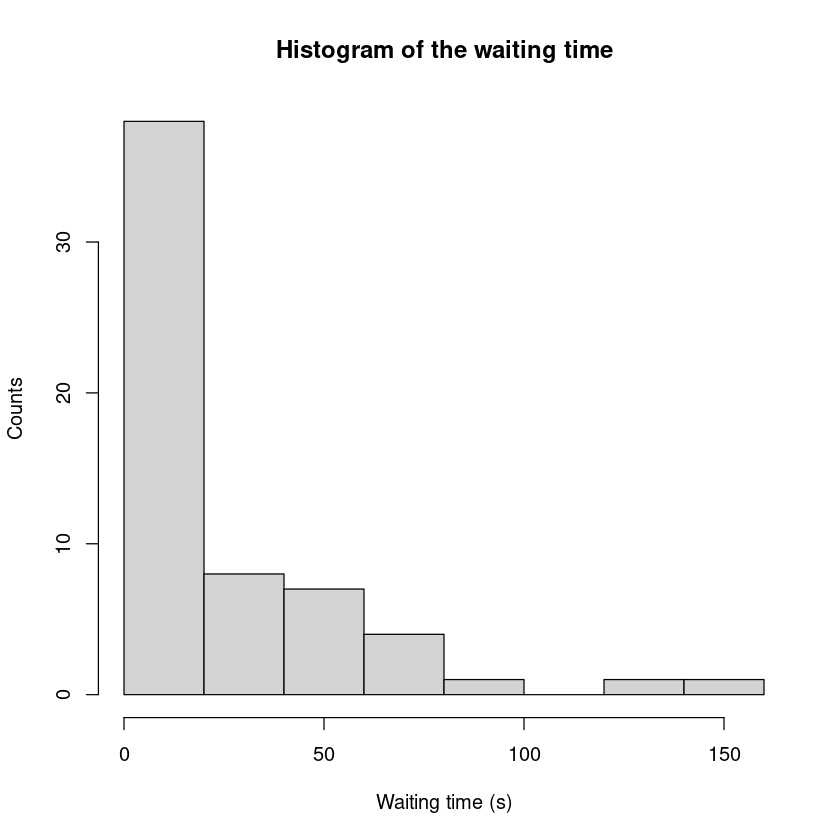

In [12]:
# Since it is a simulation, I create a function that returns the distribution of the waiting time for "number" people with "lambda" rate
exponential_cdf = function(number, lambda=1/30) {
    u = runif(number)
    out = double(number)

    for (i in 1:number) {
        out[i] = - (log(1 - u[i]))/lambda
    }
    return(out) 
}

#  And I run it for 60 people 
n = 60
lambda = 1/30
creation = exponential_cdf(n, lambda)

# Plotting the number of people w.r.t. the waiting time
hist(creation, xlab = "Waiting time (s)", ylab = "Counts", main="Histogram of the waiting time")


#### 3.2) What is the probability that a person will wait for less than 12 minutes ?

In [13]:
# In order to answer this question from the simulation, I have to count the number of people that waited less than the required time.
# I do this through the following function:
p_less = function(limit) {
    p_less = 0
    for (i in 1:n) {
        if (creation[i]<limit) {
            p_less = p_less + 1
        }
    }
    return(p_less)
}

# And I evaluate the same with the required time
limit = 12
p_less = p_less(limit)

# Afterwards I can compare the results with the theorical ones
cat("The probability of waiting less than", limit, "minutes is", p_less/n, "\n")
cat("The expected value from theory is 1 - e^(-12/30) = 0.3296799")

The probability of waiting less than 12 minutes is 0.4166667 
The expected value from theory is 1 - e^(-12/30) = 0.3296799

#### 3.3) Evaluate the average waiting time from the simulated data and compare it with the expected value

In [14]:
# For the mean time I can simply perform the mean and compare that with the expected one
mean = mean(creation)
cat("The mean value in the generated data is", mean, "\n")
cat("The expected value from theory is 1/lambda = 30")

The mean value in the generated data is 26.9337 
The expected value from theory is 1/lambda = 30

#### 3.4) What is the probability for waiting more than one hour before being received?

In [15]:
# Similarly I created a function to evaluate the probability of waiting more than a certain amount of time
p_greater = function(limit) {
    p_greater = 0
    for (i in 1:n) {
        if (creation[i] > limit) {
            p_greater = p_greater + 1
        }
    }
    return(p_greater)
}

# And I evaluate it with the required time
limit = 60
p_greater = p_greater(limit)
cat("The probability of waiting less than", limit, "minutes is", p_greater/n, "\n")
cat("The expected value from theory is 1-e^(-60/30) = 0.1353352")

The probability of waiting less than 60 minutes is 0.1166667 
The expected value from theory is 1-e^(-60/30) = 0.1353352

# Exercise 4) Multiple choices exams

#### The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives. A student either knows the answer, or selects randomly the answer among the five possible choices. Assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer ?


In [16]:
# To answer this question I run a simulation (and then I compare the results with the theorical evaluation)
total_answers = 1e4
number_questions = 5 # Number of alternatives
p = 0.7

# I create a function that generates the answer according to the given probabilities
answers_from_probability = function(p) {
    answer = 0
    u = runif(2) # I generate two random numbers: one for the accept-reject method for the probability of knowing the answer and the other for the random one

    # I assign two different values for the answers: known answer (1) or given at random (2)
    if (u[1] < as.double(p)) {
        answer = 1
    } else if (u[2] < as.double(1/number_questions)) {
        answer = 2
    }
    return(answer)
}

# I generate the answers according with the previous function
answers = rep(0, total_answers)
for (i in 1:total_answers) {
    answers[i] = answers_from_probability(p)
}

# Then I go backwards and I count the provenience of correct answers (=/= 0 in the vector) and check if the correct answer was known (1) or given at random (2)
percentage = 0
number_positive = 0
for (i in 1:total_answers) {
    if(answers[i] > 0) {
        number_positive = number_positive + 1
        if (answers[i] < 2) {
            percentage = percentage + 1
        }
    }
}
percentage = (percentage/number_positive)

cat("The probability for a right answer to have been known is", percentage, "\n")
cat("The theorical probability is 0.7/0.76 = 0.9210526")


The probability for a right answer to have been known is 0.9214106 
The theorical probability is 0.7/0.76 = 0.9210526

# Exercise 5) Waiting time

#### Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano. Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait

#### 1) at most 10 minutes


In [17]:
# I run a simulation in order to retrieve the result
# So I create a random uniform distribution of an hour, starting from the given time
random_n = 1000
date_init = "2023-06-04 10:45:00"
date_fin  = "2023-06-04 11:45:00"
minutes = difftime(date_fin, date_init, units="sec")
distribution_time = as.POSIXct(date_init) + runif(n=random_n, min=0, max=minutes)

# Then I define the accepted arrival deadlines and then I select the data that respect the deadlines:
difference_up   = 10
difference_down = 0
passage_0 = "2023-06-04 10:30:00"
passage_1 = "2023-06-04 11:00:00"
passage_2 = "2023-06-04 11:30:00"
most_10_min_1 = distribution_time[(difftime(distribution_time, passage_1, units="mins") < difference_up) & (difftime(distribution_time, passage_1, units="mins") > difference_down)]
most_10_min_2 = distribution_time[(difftime(distribution_time, passage_2, units="mins") < difference_up) & (difftime(distribution_time, passage_2, units="mins") > difference_down)]

cat("The probability for a person to wait for at most 10 minutes is:", (length(most_10_min_1) + length(most_10_min_2))/random_n, "\n")
cat("The theorical probability is: 0.333")

The probability for a person to wait for at most 10 minutes is: 0.333 
The theorical probability is: 0.333

#### 2) at least 15 minutes


In [18]:
# I use the same time distribution (even though the results will be correlated) and count the data that respect the new deadline:
difference_up   = 30
difference_down = 15
least_15_min_1 = distribution_time[(difftime(distribution_time, passage_0, units="mins") < difference_up) & (difftime(distribution_time, passage_0, units="mins") > difference_down)]
least_15_min_2 = distribution_time[(difftime(distribution_time, passage_1, units="mins") < difference_up) & (difftime(distribution_time, passage_1, units="mins") > difference_down)]

cat("The probability for a person to wait for more than 15 minutes is:", (length(least_15_min_1) + length(least_15_min_2))/random_n, "\n")
cat("The theorical probability is: 0.5")


The probability for a person to wait for more than 15 minutes is: 0.518 
The theorical probability is: 0.5

#### 3) what is the average time spent waiting?


In [19]:
# Same as before, I choose as deadline the total amount that a person could have to wait:
difference_up   = 30
difference_down = 0

# As before, I slice the time distribution based on the taken train
null_average   = distribution_time[(difftime(distribution_time, passage_0, units="mins") < difference_up) & (difftime(distribution_time, passage_0, units="mins") > difference_down)]
first_average  = distribution_time[(difftime(distribution_time, passage_1, units="mins") < difference_up) & (difftime(distribution_time, passage_1, units="mins") > difference_down)]
second_average = distribution_time[(difftime(distribution_time, passage_2, units="mins") < difference_up) & (difftime(distribution_time, passage_2, units="mins") > difference_down)]

# And then I evaluate the average waiting time as the average difference between the arrival time and the departure one, divided per the number of train taken
cat("In order, the waited time for a different train is\n", sum(difftime(null_average, passage_0, units="mins"))/length(null_average),
    "minutes for the one passing at", passage_0, ", then\n", sum(difftime(first_average, passage_1, units="mins"))/length(first_average),
    "minutes for the one passing at", passage_1, "and then\n", sum(difftime(second_average, passage_2, units="mins"))/length(second_average),
    "minutes for the one passing at", passage_2, "\n")

# Similarly I evaluate the effective average time waited for the whole population:
average_time = sum(difftime(null_average, passage_0, units="mins")) + sum(difftime(first_average, passage_1, units="mins")) + sum(difftime(second_average, passage_2, units="mins"))
cat("The average time waited is: ", (average_time/random_n), "minutes")


In order, the waited time for a different train is
 22.37262 minutes for the one passing at 2023-06-04 10:30:00 , then
 14.52341 minutes for the one passing at 2023-06-04 11:00:00 and then
 7.720655 minutes for the one passing at 2023-06-04 11:30:00 
The average time waited is:  14.95352 minutes

# Exercise 6) stock investmen

#### The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation. Mr X decides to buy 200 share of that specific stock at a price of 85 $\text{€}$ per share. What is the probability that after a year his net profit from the investment is at least 800 $\text{€}$? (suppose there are no transaction costs and that there are no annual dividend for the stock)

The probability of gaining more than 800 euros is 67.04574 %

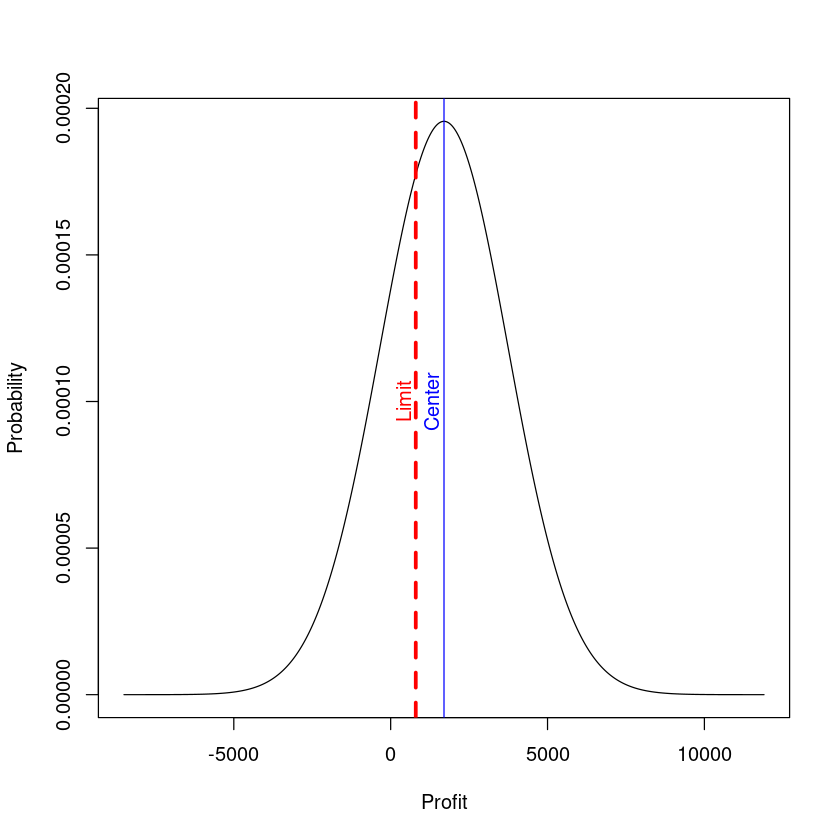

In [20]:
# I know that all the shares of each stock gain the same amount (in percentage) per year
# Thus the only relevant parameter is the total amount of money invested
center_percentage = 0.1
std_percentage = 0.12
limit = 800

n_share = 200
price_per_share = 85

# The gaussian distribution of the gainings has then the following parameters
invested = n_share*price_per_share
center = invested*center_percentage
std = invested*std_percentage

# And the probability of gaining more than 800 corresponds to the area of the gaussian over 800, as shown in the figure:
probability = pnorm(limit, mean=center, sd=std)
cat("The probability of gaining more than", limit, "euros is", (1-probability)*100, "%")

# Then I create a plot to show that the result is reasonable
x = seq(center-5*std, center+5*std, length.out=1000)
plot(x, dnorm(x, mean=center, sd=std), type="l", xlab="Profit" ,ylab="Probability")
abline(v=c(center,limit), col=c("blue", "red"), lty=c(1,2), lwd=c(1, 3))
text(x=limit-400, y=0.0001, srt=90, 'Limit', col="red")
text(x=center-400, y=0.0001, srt=90, 'Center', col="blue")
